### Introduction

In this project I want to follow CRISP-DM (Cross Industry Standard Process for Data Mining) methodology for performing data analysis on data. 

CRISP-DM consists of the following steps:
1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

### Loading data
#### Constants

In [646]:
import os

DATA_FOLDER = "data"
DATASET_URL = {
    "2018": {"path": os.path.join(DATA_FOLDER, "survey_2018.csv"), "header": "infer"},
    "2017": {"path": os.path.join(DATA_FOLDER, "survey_2017.csv"), "header": "infer"},
    "2016": {"path": os.path.join(DATA_FOLDER, "survey_2016.csv"), "header": "infer"},
    "2015": {"path": os.path.join(DATA_FOLDER, "survey_2015.csv"), "header": 1}
}

#### Loading to dataframe

In [647]:
import pandas as pd

data = {}
for key_year, param in DATASET_URL.items():
    print("Loading file: {}".format(param["path"]))
    data[key_year] = pd.read_csv(param["path"], sep=",", header=param["header"], low_memory=False)

Loading file: data/survey_2015.csv
Loading file: data/survey_2017.csv
Loading file: data/survey_2016.csv
Loading file: data/survey_2018.csv


### 1. Business Understanding

In this case there is no such thing as "business".

Stack Overflow is very popular question and answer site for programmers.

I will to look at Stack Overflow survey data (available online: https://insights.stackoverflow.com/survey) from year 2015, 2016, 2017 and 2018 (as data from 2019 is not available to be downloaded yet in raw state) in order to answer questons that bother me.

#### Motivation behind asking questions:

I have 6 years experience in IT industry. In the past I have worked as and Android Developer (Java Android), Research Scientist (C++), Automation Engineer (Java, Ruby, Python) and since last one year I took Machine Learning Enginner position (Python). As I consider my IT career quite successful so far there are few things in my life that haven't been finished. I earned Mechatronics Engineer title in the past and I finished whole Master Degree course - yet haven't attended to defend the title. This is because I had a chance to attend one year internship programme (https://www.eu-japan.eu/events/vulcanus-japan) in year 2013 and it's policy conflicted my university policy. Skills were always more important for me than titles and certificates. Consequently I've quit my university as an Engineer. From time to time I still ask myself a question whether I should return to university. I want to use this project as an opportunity to answer it.

#### Questions

1. Is university title necessary in order to become a successful programmer?
2. Is university education connected to salary and job satisfaction?
3. What programming language is most promising to learn - gives best trade off between received salary and effort (is university education rather required or not)?

### 2. Data Understanding

### 2.1 Quick look at survey from 2015

In [648]:
data["2015"].head()

,Country,Age,Gender,Tabs or Spaces,Years IT / Programming Experience,Occupation,Desktop Operating System,Desktop Operating System: write-in,Current Lang & Tech: Android,Current Lang & Tech: Arduino,...,Why use Stack Overflow: I don't use Stack Overflow,How often are Stack Overflow's answers helpful,Why answer: Help a programmer in need,Why answer: Help future programmers,Why answer: Demonstrate expertise,Why answer: Self promotion,Why answer: Sense of responsibility to developers,Why answer: No idea,Why answer: I don't answer and I don't want to,Why answer: I don't answer but I want to
0,Croatia,25-29,Male,Tabs,2 - 5 years,Back-end web developer,Ubuntu,NaN,NaN,NaN,...,NaN,Usually,NaN,NaN,It feels good to demonstrate my expertise.,Demonstrating my expertise will benefit me,I feel a sense of responsibility to the develo...,NaN,NaN,NaN
1,France,20-24,Male,Spaces,1 - 2 years,Back-end web developer,Windows 7,NaN,NaN,NaN,...,NaN,Usually,NaN,My answer will help lots of people who have th...,It feels good to demonstrate my expertise.,NaN,NaN,NaN,NaN,NaN
2,India,20-24,Male,Tabs,1 - 2 years,Back-end web developer,Windows 7,NaN,NaN,NaN,...,NaN,Rarely,NaN,NaN,NaN,Demonstrating my expertise will benefit me,NaN,NaN,NaN,NaN
3,Latvia,25-29,Male,It depends,6 - 10 years,Back-end web developer,Ubuntu,NaN,NaN,NaN,...,NaN,Usually,It feels good to help a programmer in need,My answer will help lots of people who have th...,It feels good to demonstrate my expertise.,Demonstrating my expertise will benefit me,I feel a sense of responsibility to the develo...,NaN,NaN,NaN
4,Norway,30-34,Male,Tabs,2 - 5 years,Back-end web developer,Windows 8,NaN,NaN,NaN,...,NaN,Usually,It feels good to help a programmer in need,NaN,NaN,Demonstrating my expertise will benefit me,NaN,NaN,NaN,"I don't answer much (or at all), but I want to..."


In [649]:
data["2015"].shape

(26086, 222)

In [650]:
data["2015"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26086 entries, 0 to 26085
Columns: 222 entries, Country to Why answer: I don't answer but I want to
dtypes: object(222)
memory usage: 44.2+ MB


In [651]:
for c in data["2015"].columns:
    print(c)

Country
Age
Gender
Tabs or Spaces
Years IT / Programming Experience
Occupation
Desktop Operating System
Desktop Operating System: write-in
Current Lang & Tech: Android
Current Lang & Tech: Arduino
Current Lang & Tech: AngularJS
Current Lang & Tech: C
Current Lang & Tech: C++
Current Lang & Tech: C++11
Current Lang & Tech: C#
Current Lang & Tech: Cassandra
Current Lang & Tech: CoffeeScript
Current Lang & Tech: Cordova
Current Lang & Tech: Clojure
Current Lang & Tech: Cloud
Current Lang & Tech: Dart
Current Lang & Tech: F#
Current Lang & Tech: Go
Current Lang & Tech: Hadoop
Current Lang & Tech: Haskell
Current Lang & Tech: iOS
Current Lang & Tech: Java
Current Lang & Tech: JavaScript
Current Lang & Tech: LAMP
Current Lang & Tech: Matlab
Current Lang & Tech: MongoDB
Current Lang & Tech: Node.js
Current Lang & Tech: Objective-C
Current Lang & Tech: Perl
Current Lang & Tech: PHP
Current Lang & Tech: Python
Current Lang & Tech: R
Current Lang & Tech: Redis
Current Lang & Tech: Ruby
Current L

In [652]:
data["2015"]["Why use Stack Overflow: Help for job"].unique()

array(['To get help for my job', nan], dtype=object)

In [653]:
data["2015"]["How often are Stack Overflow's answers helpful"].unique()

array(['Usually', 'Rarely', 'Sometimes', nan, 'Always', 'Never'],
      dtype=object)

In [654]:
education_cols = [
    "Training & Education: No formal training",
    "Training & Education: On the job",
    "Training & Education: Boot camp or night school",
    "Training & Education: Online Class",
    "Training & Education: Mentorship",
    "Training & Education: Industry certification",
    "Training & Education: Some college, but no CS degree",
    "Training & Education: BS in CS",
    "Training & Education: Masters in CS",
    "Training & Education: PhD in CS",
    "Training & Education: Other"]

answers_count = 0
for c in education_cols:
    answers_count += data["2015"][c].notnull().sum()
    
print("Number of people who have given an answer: {}\nNumber of answers: {}".format(
    data["2015"].shape[0], answers_count))

Number of people who have given an answer: 26086
Number of answers: 39668


In [655]:
all(data["2015"].isnull().any())

True

In [656]:
cols = ["Years IT / Programming Experience", "Compensation", "Job Satisfaction"]
for c in cols:
    print("\n---- {}".format(c))
    print(" - unique values: {}".format(data["2015"][c].unique()))
    
    empty_ratio = float(data["2015"][c].isnull().sum()) * 100 / data["2015"].shape[0] 
    print(" - empty values: {}%".format(empty_ratio))


---- Years IT / Programming Experience
 - unique values: ['2 - 5 years' '1 - 2 years' '6 - 10 years' '11+ years' 'Less than 1 year'
 nan]
 - empty values: 4.8263436326%

---- Compensation
 - unique values: ['$20,000 - $40,000' '$80,000 - $100,000' nan '$60,000 - $80,000'
 'Less than $20,000' 'Rather not say' '$40,000 - $60,000'
 '$100,000 - $120,000' '$120,000 - $140,000' 'Unemployed'
 '$140,000 - $160,000' 'More than $160,000']
 - empty values: 25.3200950702%

---- Job Satisfaction
 - unique values: ["I'm somewhat satisfied with my job"
 "I'm neither satisfied nor dissatisfied with my job" 'I love my job'
 "I'm somewhat dissatisfied with my job" 'I hate my job'
 'Other (please specify)' nan]
 - empty values: 37.9973932378%


#### Conclusions

- There are 26086 people that took part in the survey.
- There are 222 columns with unknown datatypes at first look.
- Each column contains NaN values therefore data type of each column is automatically cast to object.
- There is information related to education, satisfaction and salary as well as used programming language.
- Sometimes one column contains many answers to signle question but sometimes single question is represented by many columns - those are multichoice questions.


### 2.2 Quick look at survey from 2016

In [657]:
data["2016"].head()

,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,...,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
0,1888,Facebook,Afghanistan,Southern Asia,Central Asia,20-24,22.0,Male,Programmer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4637,Facebook,Afghanistan,Southern Asia,Central Asia,30-34,32.0,Male,Developer; Engineer; Programmer,Mobile developer - iOS,...,This is somewhat important,This is very important,This is very important,I don't care about this,This is somewhat important,This is somewhat important,I don't care about this,I don't care about this,Unrealistic expectations; Interacting with non...,To get help for my job; Because I can't do my ...
2,11164,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21378,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,Female,Engineer,DevOps,...,I don't care about this,This is somewhat important,This is very important,This is very important,I don't care about this,I don't care about this,This is very important,This is somewhat important,Corporate policies; Interacting with non-techn...,To get help for my job; Beacause I love to learn
4,30280,Facebook,Afghanistan,Southern Asia,Central Asia,> 60,65.0,Prefer not to disclose,Developer; Engineer; Programmer; Sr. Developer...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [658]:
data["2016"].shape

(56030, 66)

In [659]:
data["2016"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56030 entries, 0 to 56029
Data columns (total 66 columns):
Unnamed: 0                          56030 non-null int64
collector                           56030 non-null object
country                             55528 non-null object
un_subregion                        55313 non-null object
so_region                           55390 non-null object
age_range                           55727 non-null object
age_midpoint                        55336 non-null float64
gender                              55586 non-null object
self_identification                 54202 non-null object
occupation                          49519 non-null object
occupation_group                    46934 non-null object
experience_range                    49520 non-null object
experience_midpoint                 49520 non-null float64
salary_range                        46121 non-null object
salary_midpoint                     41742 non-null float64
big_mac_index      

In [660]:
data["2016"]["why_learn_new_tech"].unique()

array([nan, 'To keep my skills up to date', 'Other (please specify)',
       'I want to be a better developer', "I'm curious",
       'To build a specific product I have in mind',
       'I learn new technology when my job requires it',
       'To pursue career goals'], dtype=object)

In [661]:
data["2016"]["job_discovery"].unique()

array([nan,
       'I knew I wanted to work here. I sought out the opportunity directly',
       'Other', 'Contacted by company (in-house recruiter)',
       'A friend referred me', 'Self-employed - I created my own job',
       'Other job website e.g. Indeed, Monster, Dice, Xing, etc.',
       'Facebook', 'LinkedIn', 'Contacted by external recruiter',
       "I don't have a job", 'Twitter', 'Career fair', 'Stack Overflow'],
      dtype=object)

In [662]:
cols = ["job_satisfaction", "salary_range", "salary_midpoint", 
        "education", "experience_range", "experience_midpoint"]

for c in cols:
    print("\n---- {}".format(c))
    print(" - unique values: {}".format(data["2016"][c].unique()))
    
    empty_ratio = float(data["2016"][c].isnull().sum()) * 100 / data["2016"].shape[0] 
    print(" - empty values: {}%".format(empty_ratio))


---- job_satisfaction
 - unique values: [nan 'I love my job' "I don't have a job"
 "I'm somewhat satisfied with my job"
 "I'm somewhat dissatisfied with my job"
 "I'm neither satisfied nor dissatisfied" 'Other (please specify)'
 'I hate my job']
 - empty values: 28.4133499911%

---- salary_range
 - unique values: [nan '$40,000 - $50,000' 'Less than $10,000' 'More than $200,000'
 '$10,000 - $20,000' 'Rather not say' '$90,000 - $100,000' 'Unemployed'
 '$30,000 - $40,000' '$20,000 - $30,000' '$70,000 - $80,000'
 '$80,000 - $90,000' '$50,000 - $60,000' '$60,000 - $70,000'
 '$140,000 - $150,000' '$130,000 - $140,000' '$100,000 - $110,000'
 '$110,000 - $120,000' '$160,000 - $170,000' '$180,000 - $190,000'
 'Other (please specify)' '$120,000 - $130,000' '$150,000 - $160,000'
 '$190,000 - $200,000' '$170,000 - $180,000']
 - empty values: 17.6851686596%

---- salary_midpoint
 - unique values: [    nan  45000.   5000. 210000.  15000.  95000.  35000.  25000.  75000.
  85000.  55000.  65000. 1450

In [663]:
unique_education_variants = set()

for s in data["2016"]["education"].unique():
    if isinstance(s, float):
        continue
    unique_education_variants.update([v.strip() for v in s.split(";")])
    
for variant in unique_education_variants:
    print(variant)

B.A. in Computer Science (or related field)
B.S. in Computer Science (or related field)
Some college coursework in Computer Science (or related field)
On-the-job training
Masters Degree in Computer Science (or related field)
Part-time program (e.g. night school)
Full-time, intensive program (e.g. "boot-camp")
Industry certification program
I'm self-taught
Mentorship program (e.g. Flatiron School, GDI, etc.)
PhD in Computer Science (or related field)
Online class (e.g. Coursera, Codecademy, Khan Academy, etc.)


In [664]:
all(data["2016"].isnull().any())

False

In [665]:
data["2016"]["tech_do"].unique()

array([nan, 'iOS; Objective-C',
       'Android; Arduino / Raspberry Pi; AngularJS; C; C++; C#; Cassandra; CoffeeScript; Cordova; Clojure; Cloud (AWS, GAE, Azure, etc.); Dart; F#; Go; Hadoop; Haskell; iOS; Java; JavaScript; LAMP; Matlab; MongoDB; Node.js; Objective-C; Perl; PHP; Python; R; ReactJS; Redis; Ruby; Rust; Salesforce; Scala; SharePoint; Spark; SQL; SQL Server; Swift; Visual Basic; Windows Phone; WordPress',
       ...,
       'Android; C; C++; C#; iOS; Java; JavaScript; Objective-C; PHP; Python; SQL; SQL Server; WordPress',
       'C++; Cassandra; Go',
       'Arduino / Raspberry Pi; AngularJS; JavaScript; LAMP; Node.js; PHP'],
      dtype=object)

#### Conclusions

- There are 56030 people that took survey.
- There are 66 columns.
- Multiple choice questions were handled by dividing answers with semicolon in a single string.
- Not all columns contains null values but majority of them do.
- There is enough data to get information about salary, job satisfaction education and current programming language.
- There is an index column named "Unnamed: 0 ".

### 2.3 Quick look at survey from 2017

In [666]:
data["2017"].shape

(51392, 154)

In [667]:
data["2017"].head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [668]:
for c in data["2017"].columns:
    print(c)

Respondent
Professional
ProgramHobby
Country
University
EmploymentStatus
FormalEducation
MajorUndergrad
HomeRemote
CompanySize
CompanyType
YearsProgram
YearsCodedJob
YearsCodedJobPast
DeveloperType
WebDeveloperType
MobileDeveloperType
NonDeveloperType
CareerSatisfaction
JobSatisfaction
ExCoderReturn
ExCoderNotForMe
ExCoderBalance
ExCoder10Years
ExCoderBelonged
ExCoderSkills
ExCoderWillNotCode
ExCoderActive
PronounceGIF
ProblemSolving
BuildingThings
LearningNewTech
BoringDetails
JobSecurity
DiversityImportant
AnnoyingUI
FriendsDevelopers
RightWrongWay
UnderstandComputers
SeriousWork
InvestTimeTools
WorkPayCare
KinshipDevelopers
ChallengeMyself
CompetePeers
ChangeWorld
JobSeekingStatus
HoursPerWeek
LastNewJob
AssessJobIndustry
AssessJobRole
AssessJobExp
AssessJobDept
AssessJobTech
AssessJobProjects
AssessJobCompensation
AssessJobOffice
AssessJobCommute
AssessJobRemote
AssessJobLeaders
AssessJobProfDevel
AssessJobDiversity
AssessJobProduct
AssessJobFinances
ImportantBenefits
ClickyKeys
Jo

In [669]:
cols = ["Salary", "JobSatisfaction", "CareerSatisfaction", "YearsProgram", "University",
        "EducationTypes", "SelfTaughtTypes", "EducationImportant", "FormalEducation", 
        "HaveWorkedLanguage", "WantWorkLanguage"]

for c in cols:
    print("\n---- {}".format(c))
    print(" - unique values: {}".format(data["2017"][c].unique()))
    
    empty_ratio = float(data["2017"][c].isnull().sum()) * 100 / data["2017"].shape[0] 
    print(" - empty values: {}%".format(empty_ratio))


---- Salary
 - unique values: [            nan 113750.         100000.         ...  21414.91395794
 105400.           6460.13801204]
 - empty values: 74.9163293898%

---- JobSatisfaction
 - unique values: [nan  9.  3.  8.  6.  7.  5.  4. 10.  2.  0.  1.]
 - empty values: 21.4352428394%

---- CareerSatisfaction
 - unique values: [nan  8.  6.  7.  3.  9.  5. 10.  4.  0.  2.  1.]
 - empty values: 16.9228673724%

---- YearsProgram
 - unique values: ['2 to 3 years' '9 to 10 years' '20 or more years' '14 to 15 years'
 '6 to 7 years' '10 to 11 years' '13 to 14 years' '12 to 13 years'
 '15 to 16 years' '11 to 12 years' '8 to 9 years' '5 to 6 years'
 '18 to 19 years' '7 to 8 years' '1 to 2 years' '3 to 4 years'
 'Less than a year' '4 to 5 years' '17 to 18 years' '16 to 17 years'
 '19 to 20 years' nan]
 - empty values: 0.480619551681%

---- University
 - unique values: ['No' 'Yes, full-time' 'Yes, part-time' 'I prefer not to say']
 - empty values: 0.0%

---- EducationTypes
 - unique values: ['O

In [670]:
data["2017"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [671]:
data["2017"].isnull().any().sum()

147

#### Conclusions

- There are 51392 that took part in the survey.
- There are 154 columns and one of them is additional index column, so 146 can tell anything about users.
- 147 columns has nan values.
- There are columns based on which questions could be answered.
- Close to 50% data about programming experience and salary is missing. After removing such users it would be still around 26k of answers.  
- Multichoice questions are stored within single column with semicolon separator between anwers.

### 2.4 Quick look at survey from 2018

In [672]:
data["2018"].shape

(98855, 129)

In [673]:
data["2018"].head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [674]:
for c in data["2018"].columns:
    print(c)

Respondent
Hobby
OpenSource
Country
Student
Employment
FormalEducation
UndergradMajor
CompanySize
DevType
YearsCoding
YearsCodingProf
JobSatisfaction
CareerSatisfaction
HopeFiveYears
JobSearchStatus
LastNewJob
AssessJob1
AssessJob2
AssessJob3
AssessJob4
AssessJob5
AssessJob6
AssessJob7
AssessJob8
AssessJob9
AssessJob10
AssessBenefits1
AssessBenefits2
AssessBenefits3
AssessBenefits4
AssessBenefits5
AssessBenefits6
AssessBenefits7
AssessBenefits8
AssessBenefits9
AssessBenefits10
AssessBenefits11
JobContactPriorities1
JobContactPriorities2
JobContactPriorities3
JobContactPriorities4
JobContactPriorities5
JobEmailPriorities1
JobEmailPriorities2
JobEmailPriorities3
JobEmailPriorities4
JobEmailPriorities5
JobEmailPriorities6
JobEmailPriorities7
UpdateCV
Currency
Salary
SalaryType
ConvertedSalary
CurrencySymbol
CommunicationTools
TimeFullyProductive
EducationTypes
SelfTaughtTypes
TimeAfterBootcamp
HackathonReasons
AgreeDisagree1
AgreeDisagree2
AgreeDisagree3
LanguageWorkedWith
LanguageDesireN

In [675]:
cols = ["Salary", "JobSatisfaction", "CareerSatisfaction", "YearsCoding", "YearsCodingProf",
        "EducationTypes", "SelfTaughtTypes", "FormalEducation", "LanguageWorkedWith"]

for c in cols:
    print("\n---- {}".format(c))
    print(" - unique values: {}".format(data["2018"][c].unique()))
    
    empty_ratio = float(data["2018"][c].isnull().sum()) * 100 / data["2018"].shape[0] 
    print(" - empty values: {}%".format(empty_ratio))


---- Salary
 - unique values: [nan '51000' '260000' ... '5700.' '7.50' '10350']
 - empty values: 48.8361741945%

---- JobSatisfaction
 - unique values: ['Extremely satisfied' 'Moderately dissatisfied' 'Moderately satisfied'
 'Neither satisfied nor dissatisfied' 'Slightly satisfied' nan
 'Slightly dissatisfied' 'Extremely dissatisfied']
 - empty values: 29.9216023469%

---- CareerSatisfaction
 - unique values: ['Extremely satisfied' 'Neither satisfied nor dissatisfied'
 'Moderately satisfied' 'Slightly dissatisfied' 'Slightly satisfied' nan
 'Moderately dissatisfied' 'Extremely dissatisfied']
 - empty values: 22.6098831622%

---- YearsCoding
 - unique values: ['3-5 years' '30 or more years' '24-26 years' '18-20 years' '6-8 years'
 '9-11 years' '0-2 years' '15-17 years' '12-14 years' '21-23 years'
 '27-29 years' nan]
 - empty values: 5.07814475747%

---- YearsCodingProf
 - unique values: ['3-5 years' '18-20 years' '6-8 years' '12-14 years' '0-2 years'
 '21-23 years' nan '24-26 years' '9

### 2.5 Final Conclusions after looking at all four surveys

- There is a lot of information about programmers in all the surveys.
- Each survey covers slightly different topics but there should be enough information on education, progamming language preferences, job satisfaction. There is less information about salary though (50% of each group).
- Each survey has different column names even for the same features. 
- Same features between survey has different value types or ranges. 
- In order to compare change between programmer preferences across the years it will be necessary to normalize features between surveys.
- Sometimes feature change it's meaning. For example in survey from 2015, 2016 there is a job satisfaction but in 2017 and 2018 values such as job satisfaction and career satisfaciton appeared. Job can be described as "current job" or "programmer overall". This is uncertain how to treat it.
- There are really interesting insights in some survey like "EducationImportant" in survey from 2017. It is unfortunately only available for that year.
- It is important to point out that outcome of this analysis might be biased as ~100k people (after removing missing data) is only small portion of programmers across the world. Apart from that there might be much more factors why somebody is satisfied from their job (e.g. always worked in well managed companies with nice atmosphere, country situation and so on).

### 3. Data Preparation

In this part I will clean and normalize the features related to:
    
    a) education
    b) salary
    c) programming experience
    d) programing specialisation
    e) job/career satisfaction

In data exploration it was visible that columns in which I am interested has some nan values. Majority of those columns are categorical strings. **Because of that I will just drop those columns and see how many people is left for making conclusions.**

#### 3.1 Creating "is_after_university" feature

There will be 2 values:
- False - not finished any degree at university
- True - finished degree

Year 2015

Removed 4774 samples.


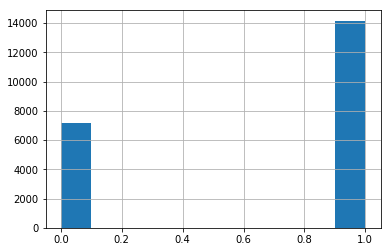

In [676]:
def add_is_finished_degree_feature_by_col(data, year, all_education_cols, finished_degree_cols):
    starting_samples = data[str(year)].shape[0]
    data[str(year)] = data[str(year)].loc[~data[str(year)][all_education_cols].isnull().all(axis=1)]
    print("Removed {} samples.".format(starting_samples - data[str(year)].shape[0]))
    
    data[str(year)]["is_finished_degree"] = data[str(year)][finished_degree_cols].notnull().any(axis=1)
    
all_education_cols_2015 = [
    "Training & Education: No formal training",
    "Training & Education: On the job",
    "Training & Education: Boot camp or night school",
    "Training & Education: Online Class",
    "Training & Education: Mentorship",
    "Training & Education: Industry certification",
    "Training & Education: Some college, but no CS degree",
    "Training & Education: BS in CS",
    "Training & Education: Masters in CS",
    "Training & Education: PhD in CS",
    "Training & Education: Other"
]

finished_degree_cols_2015 = [
    "Training & Education: Some college, but no CS degree",
    "Training & Education: BS in CS",
    "Training & Education: Masters in CS",
    "Training & Education: PhD in CS"
]

add_is_finished_degree_feature_by_col(data, 2015, all_education_cols_2015, finished_degree_cols_2015)
data["2015"]["is_finished_degree"].hist();

Year 2016

In [677]:
unique_education_values_2016 = set()
for row_value in data["2016"]["education"]:
    if isinstance(row_value, float):
        continue
    unique_education_values_2016.update([string.strip() for string in row_value.split(";")])
    
unique_education_values_2016

{'B.A. in Computer Science (or related field)',
 'B.S. in Computer Science (or related field)',
 'Full-time, intensive program (e.g. "boot-camp")',
 "I'm self-taught",
 'Industry certification program',
 'Masters Degree in Computer Science (or related field)',
 'Mentorship program (e.g. Flatiron School, GDI, etc.)',
 'On-the-job training',
 'Online class (e.g. Coursera, Codecademy, Khan Academy, etc.)',
 'Part-time program (e.g. night school)',
 'PhD in Computer Science (or related field)',
 'Some college coursework in Computer Science (or related field)'}

Removed 11287 samples.


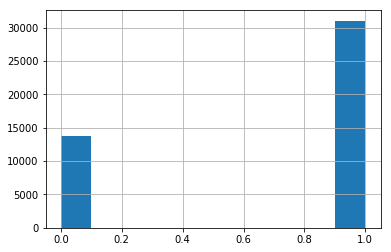

In [678]:
all_education_vals_2016 = [
 "B.A. in Computer Science (or related field)",
 "B.S. in Computer Science (or related field)",
 "Full-time, intensive program (e.g. 'boot-camp')",
 "I'm self-taught",
 "Industry certification program",
 "Masters Degree in Computer Science (or related field)",
 "Mentorship program (e.g. Flatiron School, GDI, etc.)",
 "On-the-job training",
 "Online class (e.g. Coursera, Codecademy, Khan Academy, etc.)",
 "Part-time program (e.g. night school)",
 "PhD in Computer Science (or related field)",
 "Some college coursework in Computer Science (or related field)"
]

finished_degree_vals_2016 = [
    "B.A. in Computer Science (or related field)",
    "B.S. in Computer Science (or related field)",
    "Masters Degree in Computer Science (or related field)",
    "PhD in Computer Science (or related field)",
    "Some college coursework in Computer Science (or related field)"
]

def add_is_finished_degree_feature_lambda(x, val_list):
    return False if isinstance(x, float) else any(v in x for v in val_list)
    
data["2016"]["is_finished_degree"] = data["2016"]["education"].apply(
    lambda x: add_is_finished_degree_feature_lambda(x, all_education_vals_2016))

starting_samples = data["2016"].shape[0]
data["2016"] = data["2016"].loc[data["2016"]["is_finished_degree"] != False]
print("Removed {} samples.".format(starting_samples - data["2016"].shape[0]))

data["2016"]["is_finished_degree"] = data["2016"]["education"].apply(
    lambda x: add_is_finished_degree_feature_lambda(x, finished_degree_vals_2016))
data["2016"]["is_finished_degree"].hist();

Year 2017

In [679]:
unique_education_values_2017 = data["2017"]["FormalEducation"].unique()

for val in unique_education_values_2017:
    print(val)

Secondary school
Some college/university study without earning a bachelor's degree
Bachelor's degree
Doctoral degree
Master's degree
Professional degree
Primary/elementary school
I prefer not to answer
I never completed any formal education


Removed 1109 samples.


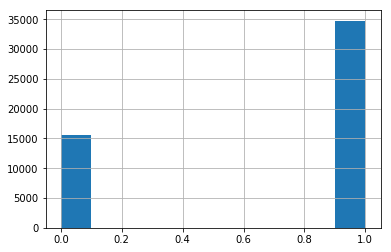

In [680]:
all_education_vals_2017 = [
    "Secondary school",
    "Some college/university study without earning a bachelor's degree",
    "Bachelor's degree",
    "Doctoral degree",
    "Master's degree",
    "Professional degree",
    "Primary/elementary school",
    "I prefer not to answer",
    "I never completed any formal education"
]

finished_degree_vals_2017 = [
    "Master's degree",
    "Doctoral degree",
    "Bachelor's degree",
    "Professional degree"
]

starting_samples = data["2017"].shape[0]
data["2017"] = data["2017"].loc[data["2017"]["FormalEducation"].isin(all_education_vals_2017)]
data["2017"] = data["2017"].loc[data["2017"]["FormalEducation"] != "I prefer not to answer"]
print("Removed {} samples.".format(starting_samples - data["2017"].shape[0]))

data["2017"]["is_finished_degree"] = data["2017"]["FormalEducation"].isin(finished_degree_vals_2017)
data["2017"]["is_finished_degree"].hist();

Year 2018

In [681]:
unique_education_values_2018 = data["2018"]["FormalEducation"].unique()

for val in unique_education_values_2018:
    print(val)

Bachelor’s degree (BA, BS, B.Eng., etc.)
Associate degree
Some college/university study without earning a degree
Master’s degree (MA, MS, M.Eng., MBA, etc.)
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)
nan
Primary/elementary school
Professional degree (JD, MD, etc.)
I never completed any formal education
Other doctoral degree (Ph.D, Ed.D., etc.)


Removed 4152 samples.


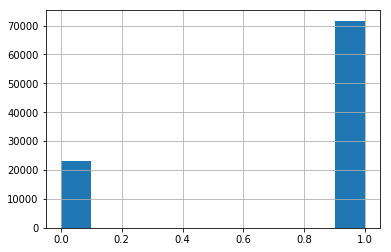

In [682]:
all_education_vals_2018 = [
    "Bachelor’s degree (BA, BS, B.Eng., etc.)",
    "Associate degree",
    "Some college/university study without earning a degree",
    "Master’s degree (MA, MS, M.Eng., MBA, etc.)",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",
    "Primary/elementary school",
    "Professional degree (JD, MD, etc.)",
    "I never completed any formal education",
    "Other doctoral degree (Ph.D, Ed.D., etc.)"
]

finished_degree_vals_2018 = [
   "Bachelor’s degree (BA, BS, B.Eng., etc.)",
   "Master’s degree (MA, MS, M.Eng., MBA, etc.)",
   "Professional degree (JD, MD, etc.)",
   "Other doctoral degree (Ph.D, Ed.D., etc.)",
   "Associate degree"
]


starting_samples = data["2018"].shape[0]
data["2018"] = data["2018"].loc[data["2018"]["FormalEducation"].isin(all_education_vals_2018)]
print("Removed {} samples.".format(starting_samples - data["2018"].shape[0]))

data["2018"]["is_finished_degree"] = data["2018"]["FormalEducation"].isin(finished_degree_vals_2018)
data["2018"]["is_finished_degree"].hist();

#### 3.2 Creating "normalized_salary" feature

We cannot say what the normalized values should be. Let's preview them now.

Year 2015

In [683]:
data["2015"]["Compensation"].unique()

array(['$20,000 - $40,000', '$80,000 - $100,000', nan,
       '$60,000 - $80,000', 'Less than $20,000', 'Rather not say',
       '$40,000 - $60,000', '$100,000 - $120,000', '$120,000 - $140,000',
       'Unemployed', '$140,000 - $160,000', 'More than $160,000'],
      dtype=object)

Year 2016

In [684]:
data["2016"]["salary_range"].unique()

array(['$40,000 - $50,000', 'Less than $10,000', 'More than $200,000',
       '$10,000 - $20,000', nan, '$90,000 - $100,000', 'Unemployed',
       '$30,000 - $40,000', '$20,000 - $30,000', '$70,000 - $80,000',
       'Rather not say', '$80,000 - $90,000', '$50,000 - $60,000',
       '$60,000 - $70,000', '$130,000 - $140,000', '$100,000 - $110,000',
       '$110,000 - $120,000', '$160,000 - $170,000',
       '$180,000 - $190,000', 'Other (please specify)',
       '$140,000 - $150,000', '$120,000 - $130,000',
       '$150,000 - $160,000', '$190,000 - $200,000',
       '$170,000 - $180,000'], dtype=object)

Year 2017

In [685]:
data["2017"]["Salary"].unique()

array([            nan, 113750.        , 100000.        , ...,
        21414.91395794, 105400.        ,   6460.13801204])

In [686]:
data["2017"]["Salary"].nunique()

3033

In [687]:
data["2017"]["Salary"].max()

197000.0

In [688]:
data["2017"]["Salary"].min()

0.0

Year 2018

In [689]:
data["2018"]["Salary"].unique()

array([nan, '51000', '260000', ..., '5700.', '7.50', '10350'],
      dtype=object)

In [690]:
data["2018"]["Salary"].nunique()

3957

In [691]:
data["2018"]["Salary"].max()

'999999999999999999999999999999'

In [692]:
data["2018"]["Salary"].min()

inf

#### Conclusion

There are numerical values in year 2017-2018 which can be easily turned into thresholds. Values from year 2015-2016 are categorical thresholds. 2016 is more detailed so it is impossible to wrangle data from year 2015 to the same shape. Because of that I will normalize values so they are the similar to year 2015.

I will also remove people that didn't give any answer.

Year 2015

In [693]:
starting_samples = data["2015"].shape[0]
data["2015"] = data["2015"].loc[data["2015"]["Compensation"] != "Rather not say"]
data["2015"].reset_index(inplace=True, drop=True)
data["2015"]["normalized_salary"] = data["2015"]["Compensation"].replace({"Unemployed": "0"})
data["2015"]["normalized_salary"].dropna(inplace=True)
print("Removed {} samples.".format(starting_samples - data["2015"].shape[0]))

Removed 2622 samples.


In [694]:
data["2015"].groupby("is_finished_degree")["normalized_salary"].value_counts()

is_finished_degree  normalized_salary  
False               Less than $20,000      1541
                    0                      1011
                    $20,000 - $40,000       872
                    $40,000 - $60,000       675
                    $60,000 - $80,000       484
                    $80,000 - $100,000      364
                    $100,000 - $120,000     229
                    $120,000 - $140,000     148
                    More than $160,000      135
                    $140,000 - $160,000      63
True                Less than $20,000      2446
                    $20,000 - $40,000      1854
                    $40,000 - $60,000      1751
                    $60,000 - $80,000      1522
                    $80,000 - $100,000     1028
                    0                       983
                    $100,000 - $120,000     761
                    $120,000 - $140,000     414
                    More than $160,000      327
                    $140,000 - $160,000     215


Year 2016

In [695]:
values_to_remove = ["Rather not say", "Other (please specify)"]
mappings = {
    "Less than $10,000": "Less than $20,000",
    "$10,000 - $20,000": "Less than $20,000",
    "$20,000 - $30,000": "$20,000 - $40,000",
    "$30,000 - $40,000": "$20,000 - $40,000",
    "$40,000 - $50,000": "$40,000 - $60,000",
    "$50,000 - $60,000": "$40,000 - $60,000",
    "$60,000 - $70,000": "$60,000 - $80,000",
    "$70,000 - $80,000": "$60,000 - $80,000",
    "$80,000 - $90,000": "$80,000 - $100,000",
    "$90,000 - $100,000": "$80,000 - $100,000",
    "$100,000 - $110,000": "$100,000 - $120,000",
    "$110,000 - $120,000": "$100,000 - $120,000",
    "$120,000 - $130,000": "$120,000 - $140,000",
    "$130,000 - $140,000": "$120,000 - $140,000",
    "$140,000 - $150,000": "$140,000 - $160,000",
    "$150,000 - $160,000": "$140,000 - $160,000",
    "$160,000 - $170,000": "More than $160,000",
    "$170,000 - $180,000": "More than $160,000",
    "$180,000 - $190,000": "More than $160,000",
    "$190,000 - $200,000": "More than $160,000",
    "More than $200,000": "More than $160,000",
    "Unemployed": "0"
}

starting_samples = data["2016"].shape[0]
data["2016"] = data["2016"].loc[~data["2016"]["salary_range"].isin(values_to_remove)]
data["2016"]["salary_range"].reset_index(inplace=True, drop=True)
data["2016"]["normalized_salary"] = data["2016"]["salary_range"].replace(mappings)
data["2016"]["normalized_salary"].dropna(inplace=True)
print("Removed {} samples.".format(starting_samples - data["2016"].shape[0]))

Removed 2168 samples.


Year 2017

In [696]:
def to_categorical_salary(x):    
    if x >= 160000:
        return "More than $160,000"
    elif x >= 140000 and x < 160000:
        return "$140,000 - $160,000"
    elif x >= 120000 and x < 140000:
        return "$120,000 - $140,000"
    elif x >= 100000 and x < 120000:
        return "$100,000 - $120,000"
    elif x >= 80000 and x < 100000:
        return "$80,000 - $100,000"
    elif x >= 60000 and x < 80000:
        return "$60,000 - $80,000"
    elif x >= 40000 and x < 60000:
        return "$40,000 - $60,000"
    elif x >= 20000 and x < 40000:
        return "$20,000 - $40,000"
    elif x > 0 and x < 20000:
        return "Less than $20,000"
    elif x == 0:
        return "0"
    else:
        return x

starting_samples = data["2017"].shape[0]

unemployed_values = ["Not employed, and not looking for work", "Not employed, but looking for work"]
data["2017"].loc[data["2017"]["EmploymentStatus"].isin(unemployed_values), "Salary"] = 0

data["2017"]["normalized_salary"] = data["2017"]["Salary"].apply(lambda x: to_categorical_salary(x))
data["2017"]["normalized_salary"].dropna(inplace=True)

print("Removed {} samples.".format(starting_samples - data["2017"].shape[0]))

Removed 0 samples.


In [697]:
data["2017"].groupby("is_finished_degree")["normalized_salary"].value_counts()

is_finished_degree  normalized_salary  
False               0                      3620
                    $20,000 - $40,000       648
                    $40,000 - $60,000       646
                    Less than $20,000       622
                    $60,000 - $80,000       383
                    $80,000 - $100,000      244
                    $100,000 - $120,000     180
                    $120,000 - $140,000     104
                    $140,000 - $160,000      61
                    More than $160,000       36
True                $40,000 - $60,000      2088
                    Less than $20,000      1938
                    0                      1713
                    $20,000 - $40,000      1693
                    $60,000 - $80,000      1557
                    $80,000 - $100,000      974
                    $100,000 - $120,000     738
                    $120,000 - $140,000     507
                    $140,000 - $160,000     255
                    More than $160,000      166


Year 2018

In [698]:
starting_samples = data["2018"].shape[0]

unemployed_values = ["Not employed, and not looking for work", "Not employed, but looking for work", "Retired"]
data["2018"].loc[data["2018"]["Employment"].isin(unemployed_values), "Salary"] = 0
data["2018"]["Salary"] = data["2018"]["Salary"].apply(lambda x : x.replace(",", "") if isinstance(x, str) else x)
data["2018"]["normalized_salary"] = data["2018"]["Salary"].astype(float).apply(lambda x: to_categorical_salary(x))
data["2018"]["normalized_salary"].dropna(inplace=True)

print("Removed {} samples.".format(starting_samples - data["2018"].shape[0]))

Removed 0 samples.


In [699]:
data["2018"].groupby("is_finished_degree")["normalized_salary"].value_counts()

is_finished_degree  normalized_salary  
False               0                      5785
                    Less than $20,000      3773
                    $20,000 - $40,000      1197
                    $40,000 - $60,000      1078
                    $60,000 - $80,000       817
                    More than $160,000      754
                    $80,000 - $100,000      578
                    $100,000 - $120,000     477
                    $120,000 - $140,000     385
                    $140,000 - $160,000     223
True                Less than $20,000      9224
                    More than $160,000     5425
                    $40,000 - $60,000      4888
                    $60,000 - $80,000      4514
                    $20,000 - $40,000      4323
                    0                      4115
                    $80,000 - $100,000     3460
                    $100,000 - $120,000    2770
                    $120,000 - $140,000    2157
                    $140,000 - $160,000    1320


#### 3.3 Adding "normalized_programming_experience" feature

In [700]:
data["2015"]["Years IT / Programming Experience"].unique()

array(['2 - 5 years', '1 - 2 years', '6 - 10 years', '11+ years',
       'Less than 1 year', nan], dtype=object)

In [701]:
data["2016"]["experience_range"].unique()

array(['6 - 10 years', '11+ years', '1 - 2 years', '2 - 5 years',
       'Less than 1 year', nan], dtype=object)

In [702]:
data["2017"]["YearsProgram"].unique()

array(['2 to 3 years', '9 to 10 years', '20 or more years',
       '14 to 15 years', '6 to 7 years', '10 to 11 years',
       '13 to 14 years', '12 to 13 years', '15 to 16 years',
       '11 to 12 years', '8 to 9 years', '5 to 6 years', '18 to 19 years',
       '7 to 8 years', '1 to 2 years', 'Less than a year', '4 to 5 years',
       '3 to 4 years', '17 to 18 years', '16 to 17 years',
       '19 to 20 years', nan], dtype=object)

In [703]:
data["2018"]["YearsCoding"].unique()

array(['3-5 years', '30 or more years', '24-26 years', '18-20 years',
       '6-8 years', '9-11 years', '0-2 years', '15-17 years',
       '12-14 years', '21-23 years', '27-29 years', nan], dtype=object)

Again, data has to be normalized and it is limited by values in year 2015 and 2016. It is less accurate as working year limit is set to 11+ years.

Year 2015

In [711]:
data["2015"]["normalized_programming_experience"] = data["2015"]["Years IT / Programming Experience"].copy()
data["2015"]["normalized_programming_experience"].dropna(inplace=True)

data["2015"].groupby(["is_finished_degree", "normalized_programming_experience"])["normalized_salary"].value_counts()

is_finished_degree  normalized_programming_experience  normalized_salary  
False               1 - 2 years                        Less than $20,000       394
                                                       0                       290
                                                       $20,000 - $40,000       125
                                                       $40,000 - $60,000        68
                                                       $60,000 - $80,000        33
                                                       $80,000 - $100,000       24
                                                       $100,000 - $120,000       9
                                                       More than $160,000        6
                                                       $120,000 - $140,000       4
                                                       $140,000 - $160,000       1
                    11+ years                          $40,000 - $60,000       187
            

In [712]:
data["2015"]["normalized_programming_experience"].unique()

array(['2 - 5 years', '1 - 2 years', '6 - 10 years', '11+ years',
       'Less than 1 year'], dtype=object)

Year 2016

In [713]:
data["2016"]["normalized_programming_experience"] = data["2016"]["experience_range"].copy()
data["2016"]["normalized_programming_experience"].dropna(inplace=True)

data["2016"].groupby(["is_finished_degree", "normalized_programming_experience"])["normalized_salary"].value_counts()

is_finished_degree  normalized_programming_experience  normalized_salary  
False               1 - 2 years                        Less than $20,000       380
                                                       $20,000 - $40,000       271
                                                       $40,000 - $60,000       215
                                                       $60,000 - $80,000       196
                                                       $80,000 - $100,000      116
                                                       $100,000 - $120,000     108
                                                       0                        73
                                                       $120,000 - $140,000      57
                                                       More than $160,000       47
                                                       $140,000 - $160,000      34
                    11+ years                          Less than $20,000       616
            

In [714]:
data["2016"]["normalized_programming_experience"].unique()

array(['6 - 10 years', '11+ years', '1 - 2 years', '2 - 5 years',
       'Less than 1 year'], dtype=object)

Year 2017

In [715]:
mapping = {
    "Less than a year": "Less than 1 year",
    "1 to 2 years": "1 - 2 years",
    "2 to 3 years": "2 - 5 years",
    "3 to 4 years": "2 - 5 years",
    "4 to 5 years": "2 - 5 years",
    "5 to 6 years": "6 - 10 years",
    "6 to 7 years": "6 - 10 years",
    "7 to 8 years": "6 - 10 years",
    "8 to 9 years": "6 - 10 years",
    "9 to 10 years": "6 - 10 years",
    "10 to 11 years": "6 - 10 years",
    "11 to 12 years": "11+ years",
    "12 to 13 years": "11+ years",
    "13 to 14 years": "11+ years",
    "14 to 15 years": "11+ years",
    "15 to 16 years": "11+ years",
    "16 to 17 years": "11+ years",
    "17 to 18 years": "11+ years",
    "18 to 19 years": "11+ years",
    "19 to 20 years": "11+ years",
    "20 or more years": "11+ years"
}


data["2017"]["normalized_programming_experience"] = data["2017"]["YearsProgram"].map(mapping)
data["2017"]["normalized_programming_experience"].dropna(inplace=True)

data["2017"].groupby(["is_finished_degree", "normalized_programming_experience"])["normalized_salary"].value_counts()

is_finished_degree  normalized_programming_experience  normalized_salary  
False               1 - 2 years                        0                       631
                                                       Less than $20,000        27
                                                       $20,000 - $40,000        19
                                                       $40,000 - $60,000         7
                                                       $60,000 - $80,000         3
                                                       $80,000 - $100,000        2
                                                       $100,000 - $120,000       1
                                                       $120,000 - $140,000       1
                    11+ years                          $40,000 - $60,000       354
                                                       $60,000 - $80,000       227
                                                       $20,000 - $40,000       212
            

In [716]:
data["2017"]["normalized_programming_experience"].unique()

array(['2 - 5 years', '6 - 10 years', '11+ years', '1 - 2 years',
       'Less than 1 year'], dtype=object)

Year 2018

In [718]:
data["2018"]["YearsCoding"].unique()

array(['3-5 years', '30 or more years', '24-26 years', '18-20 years',
       '6-8 years', '9-11 years', '0-2 years', '15-17 years',
       '12-14 years', '21-23 years', '27-29 years', nan], dtype=object)

In [719]:
data["2016"]["normalized_programming_experience"].unique()

array(['6 - 10 years', '11+ years', '1 - 2 years', '2 - 5 years',
       'Less than 1 year'], dtype=object)

In [ ]:
mapping = [
    "0-2 years": "'Less than 1 year'"
    "3-5 years":
    "6-8 years":
    "9-11 years"
    "12-14 years":
    "15-17 years":
    "18-20 years":
    "21-23 years":
    "24-26 years":
    "27-29 years": 
    "30 or more years":
]

